# 二部グラフ

グラフGの頂点集合V(G)を, $V_1$に属する頂点集合同士が隣接せず、$V_2$に属する頂点集合同士が隣接しないように${V_1, V_2}$に分割できるとき、Gを「**二部グラフ**」$V_1, V_2$ を**部集合**という。

また、$V_1$の各頂点が$V_2$の全ての頂点と隣接している時、「**Gを完全二部グラフ**」という、

## 二部グラフの特徴
- どんな閉路を選んでも、$V_1$の頂点と$V_2$の頂点が互いに出てくるという
- **奇閉路**を含まない(奇閉路のどこかで、同じ部集合に属する頂点が連続してしまうことから、異なる部集合の頂点が互いに出てくる二部グラフの特徴と矛盾していることがわかる)  
<=>閉路は頂点が偶数個のときに限り2部グラフである。
- マッチングの最適化問題でよく出てくる。
- 2部グラフの最大マッチングは多項式時間で求められる。([最大フロー問題](https://ja.wikipedia.org/wiki/%E6%9C%80%E5%A4%A7%E3%83%95%E3%83%AD%E3%83%BC%E5%95%8F%E9%A1%8C)を参照。)
- 木は2部グラフである。(木の高さが偶数のノードは$V_1$の集合、高さが奇数のノードは$V_2$の集合と分けると、$V_1$の頂点と$V_2$の頂点が交互に来ることからもわかる)
- Königの定理：2部グラフにおいて、最大マッチングの辺数は最小点被覆の点数と等しい。

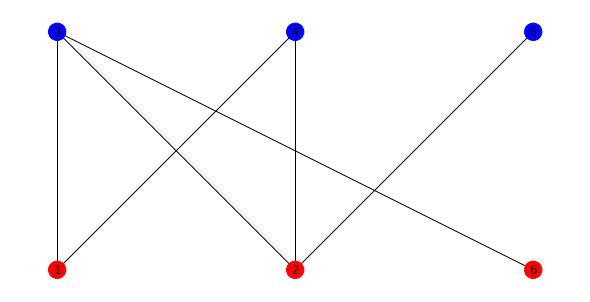

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
# 1, 2, 6を赤色、 3, 4, 5を青色の二部グラフとする
ncolors = ["red","red","blue","blue","blue","red"]
G.add_edges_from([(1,3), (2,4), (2,5), (3,6), (3, 2), (1, 4)])

pos = {1: (0, 0), 2: (1, 0), 3: (0, 1), 4: (1, 1), 5: (2, 1), 6: (2, 0),}

plt.figure(figsize=(8,4))
# 左がユーザ、右が食品、エッジの色が評価を示す
nx.draw(G, pos=pos, node_color=ncolors, with_labels=True)
plt.show()

## 与えられたグラフが二部かどうかの判定
DFSやBFS、Union-Find 木で解くことができる。(実装例はDFS)

まず、DFS の始点となる頂点 v については白黒いずれに塗ってもよいです。ここでは白としてみます。そうすると

- 白頂点に隣接した頂点は黒でなければならない
- 黒頂点に隣接した頂点は白でなければならない

という条件を基に探索する、隣ある頂点の色が連続してしまえが、そのグラフが二部グラフでないことが確定する、

**color 配列を用意して、1(黒色), 0(白色), -1(未訪問) として管理すれば良い**

In [29]:
from sys import stdin, setrecursionlimit
from typing import Counter

setrecursionlimit(10**6)


def is_bipartite(graph):
    N = len(graph)

    # それぞれの頂点の色を判別するための配列。
    # 1: 黒、0: 白、-1: 未訪問
    colors = [-1]*N

    # グラフが二部グラフかどうかのフラグ(この問題では木が与えられているので、グラフが二部グラフであることは確定している)
    is_bipartite = True

    def dfs(v, current_color=0):
        colors[v] = current_color
        for adjacent in graph[v]:
            # 既に隣接頂点の色が決まっている場合
            if colors[adjacent] != -1:
                if colors[adjacent] == current_color:
                    return False
                continue

            # 1-current_colorとすると、1と
            if dfs(adjacent, 1-current_color) == False:
                return False
        return True

    # 全ての辺を探索する
    for v in range(N):
        if colors[v] != -1:
            continue
        if dfs(v) == False:
            is_bipartite = False

    print("Yes" if is_bipartite else "No")

In [31]:
N = 6
edges = [(1,3), (2,4), (2,5), (3,6), (3, 2), (1, 4)]
# 同じ部集合に属する 3, 4 の間に辺を作ると二部グラフではなくなる。
# edges = [(1,3), (2,4), (2,5), (3,6), (3, 2), (1, 4), (3, 4)]

graph = [[] for _ in range(N)]
for edge in edges:
    graph[edge[0]-1].append(edge[1]-1)
    graph[edge[1]-1].append(edge[0]-1)

is_bipartite(graph)

Yes


## 参考文献
- https://qiita.com/drken/items/a803d4fc4a727e02f7ba
- https://ja.wikipedia.org/wiki/2%E9%83%A8%E3%82%B0%E3%83%A9%E3%83%95